In [ ]:
from google.colab import drive
drive.mount('/content/drive')

index
gender: 성별

car: 차량 소유 여부

reality: 부동산 소유 여부

child_num: 자녀 수

income_total: 연간 소득

income_type: 소득 분류
							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

edu_type: 교육 수준
							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

family_type: 결혼 여부
							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

house_type: 생활 방식
							['Municipal apartment', 'House / apartment', 'With parents',

							 'Co-op apartment', 'Rented apartment', 'Office apartment']

DAYS_BIRTH: 출생일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

DAYS_EMPLOYED: 업무 시작일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

							양수 값은 고용되지 않은 상태를 의미함

FLAG_MOBIL: 핸드폰 소유 여부

work_phone: 업무용 전화 소유 여부

phone: 전화 소유 여부

email: 이메일 소유 여부

occyp_type: 직업 유형

family_size: 가족 규모

begin_month: 신용카드 발급 월
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


def birth_calculator(val1 ,val2):
  birth = round(val1/365, 0)
  employed_time = round(val2/365, 0)
  return birth, employed_time
  # i'll just analyze employed data with this function at same time.


def title_save(col):
  for i in col:
    title_base.append(i)
  title_base.pop(0)
  return title_base


title_base = []

# load excel file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

headers = title_save(df.columns)

nonDup_data = df.drop_duplicates(headers, keep = 'first')
eachAge,eachHire = birth_calculator(abs(nonDup_data['DAYS_BIRTH']), nonDup_data['DAYS_EMPLOYED'])

ageDb = []
hireDb = []

for i,j in zip(eachAge,eachHire):
  ageDb.append(i)
  hireDb.append(j)
nonDup_data['DAYS_BIRTH'] = ageDb
nonDup_data['DAYS_EMPLOYED'] = hireDb

nonDup_data

# On this code, I intend to remove some perfectly duplicated values from the table
# And then, analyze the number of rest of them with changing birth and emplyed values to the normal form
# that we get used to.


<ipython-input-126-ab506cd6dbe9>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonDup_data['DAYS_BIRTH'] = ageDb
<ipython-input-126-ab506cd6dbe9>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonDup_data['DAYS_EMPLOYED'] = hireDb


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.0,-13.0,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.0,-4.0,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.0,-12.0,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.0,-6.0,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.0,-6.0,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,33.0,-5.0,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,42.0,-7.0,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,28.0,-6.0,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,28.0,-0.0,1,0,0,0,Laborers,1.0,-59.0,2.0


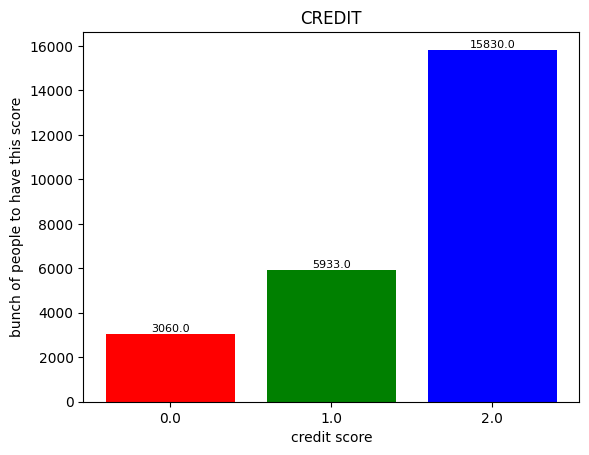

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

credits = nonDup_data['credit'].value_counts(ascending = True)

x = [0.0,1.0, 2.0]
y = []

for i in credits:
  y.append(i)

bar = plt.bar(x,y, color = ['r', 'g', 'b'])
plt.xticks(x, x)
plt.title('CREDIT')
plt.xlabel('credit score')
plt.ylabel('bunch of people to have this score')

for i in bar:
  height = i.get_height()
  plt.text(i.get_x() + i.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 8)

plt.show()






In [ ]:

db = nonDup_data['occyp_type'].fillna('No').value_counts(ascending = True)

# j = 0
# for i in db:
#   j += i
# print(j)

db

IT staff                   40
HR staff                   57
Realty agents              58
Secretaries                94
Low-skill Laborers        115
Waiters/barmen staff      118
Private service staff     226
Cleaning staff            384
Security staff            399
Cooking staff             433
Medicine staff            812
Accountants               838
High skill tech staff     983
Drivers                  1489
Managers                 2024
Sales staff              2382
Core staff               2504
Laborers                 4254
No                       7613
Name: occyp_type, dtype: int64

In [ ]:
# tesorflow model

model = tf.keras.models.Squential([
    tf.keras.layers.Dense(),
    tf.keras.layers.Dense(),
    tf.keras.layers.Dense()
    # 각각이 히든 레이어가 된다고 보면 된다.
    # parenthases 안에 값은 히든 레이어의 갯수를 의미하고 마지막의 레이어는 하나로 고정해야 할 것이다.
    # 왜냐하면 우리는 정확도를 소수점으로 표현 할 것이디 때문이다.
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# optimizer는 각각의 튀는 값들을 보정해주는 것이고, 내가 원하는 값이 0과 1사이의 값이라고 가정하면ㅊ binary_crossentropy를 사용한다.
# 마지막의 metrics는 내가 원하는 결과의 이름을 정해준 것이다.

model.fit()
# train set, solution, epochs : 학습의 횟수

predictions = model.predict([])

In [ ]:
!pip install sklearn
!pip install Quandl
!pip install pandas

  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
